#  The Sparks Foundation
# Prediction Using Unsupervised ML

## Name: UJJWAL SAXENA


### OBJECTIVE:-
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
### Dataset:- https://bit.ly/3kXTdox



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [4]:
# Load the iris dataset
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [5]:
import io
df=pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# shape of the data
df.shape

(150, 6)

In [7]:
iris=df.copy()

Looking at the data, we can see that there is column 'Id' which is not necessary. So we are removing it using del method.

In [11]:
# removing a column
iris.drop('Id',inplace=True,axis=1)
iris.head()
# del iris['Id']

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# shape of the data
iris.shape

(150, 5)

In [13]:
# checking total number of records for each species
iris["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
# checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# looking at the statistical measures 
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory data analysis(EDA)

#### Bivariate analysis

##### Scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

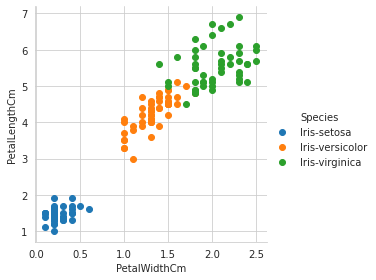

In [17]:
## Bivariate analysis for 2 independent features
## Scatter plot between Petal width and petal length
plt.figure(figsize=(10,10))
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1440 with 0 Axes>

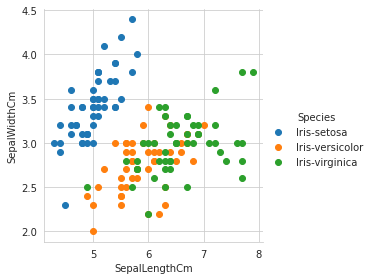

In [18]:
## Scatter plot between Sepal width and Sepal length
plt.figure(figsize=(15,20))
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


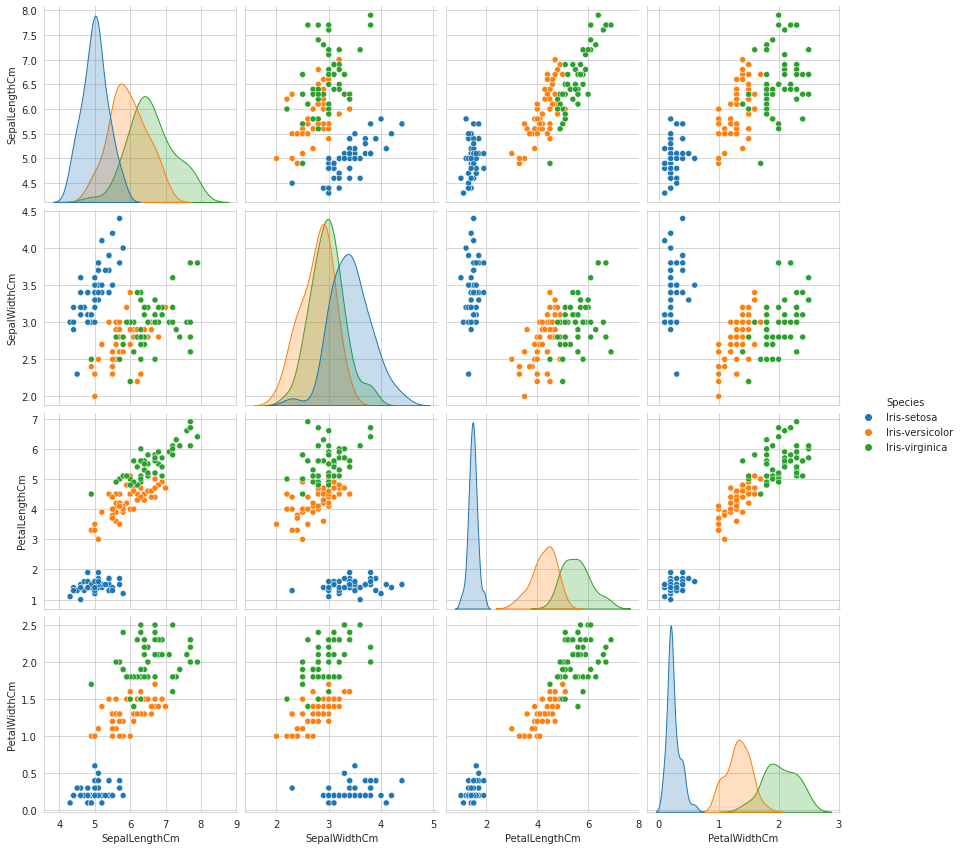

In [19]:
#Pair plot

plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

###### Observation:

From the above pair plot we can see that,

1. Petal width and Petal Length of setosa species is easily separable.
2. Sepal width and Sepal Length of all three species is overlapped.
3. Petal length and petal width are more useful features to predict species type.

[]

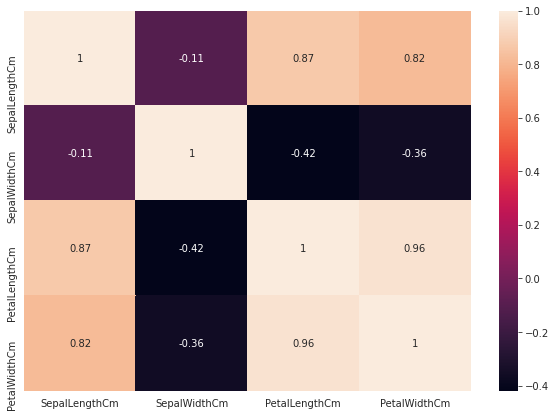

In [21]:
## heat map
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

From the above heat map we can see that Sepal width and sepal length is slightly correlated with each other.

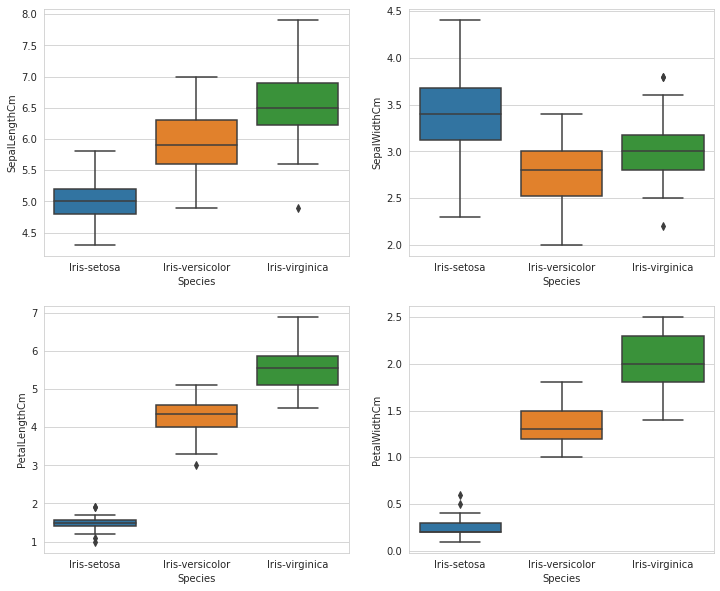

In [25]:
## Box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y= 'SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x= 'Species',y= 'SepalWidthCm' ,data=iris)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species' ,y= 'PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y= 'PetalWidthCm',data=iris)


Above boxplot shows the distribution of the input variables and outliers.
From the boxplot we can see that iris-setosa is negatively skewed and have few outliers and other species are normally distributed.

## Predicting optimal number of clusters

There are different methods to predict optimal number of clusters. We are using **KMeans clustering** in this task. This is a partitioning clustering which requires the user to specify the number of clusters to be generated.

First we are implementing K-means clustering:

1. Choosimg number of clusters k
2. Select random points(k) as centroids
3. Assigning all the points to the closest centroid value of that cluster.
4. Recompute the centroids of newly formed clusters.
Steps 3 and 4 are repeated

In [26]:
# KMeans
x = iris.iloc[:, [0, 1, 2, 3]].values
y = iris['Species']
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Elbow method to determine the optimal number of clusters:

Implementing elbow method:
1. For each clusters k, calculate the total WSS(within-cluster sum of square), i.e  WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.
2. Plotting the curve according to the number of clusters k.
3. The point where the line bend in the plot is considered as appropriate number of clusters.

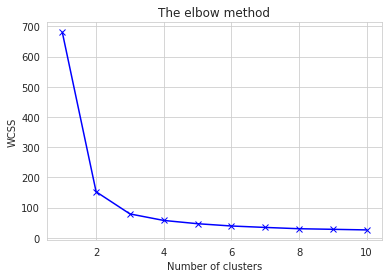

In [27]:
#elbow method
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From the above Elbow method we can see that the line bend at the point 3. Therefore, we consider 3 as number of clusters.

In [28]:
# Fitting the K-means model

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
# .fit(), .predict() are used in supervised learning. For unsupervised learning we use .fit_predict() 
# These are implemented using estimators. An estimator helps in training the model and is used for model training.

In [34]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

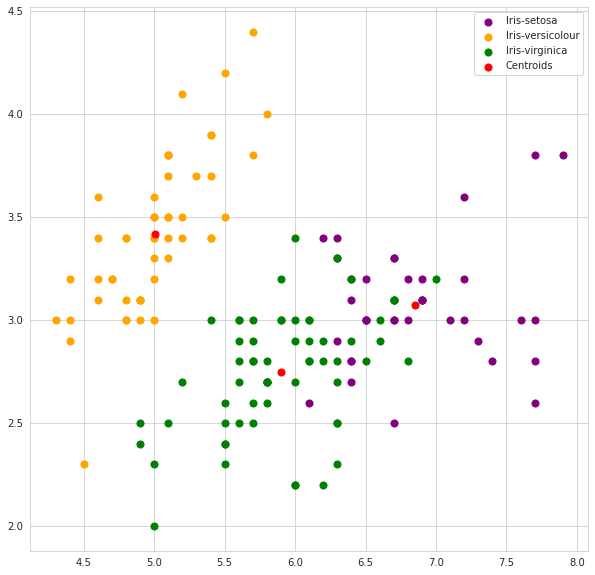

In [29]:
#Visualising the clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

The red points are the centroids, we can identify the center points of the data by using following code:

In [30]:
centers = kmeans.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


We can compare the actual and predicted sepal length and width by plotting scatter plot.

In [32]:
# Encode for string labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

Text(0.5, 1.0, 'Predicted')

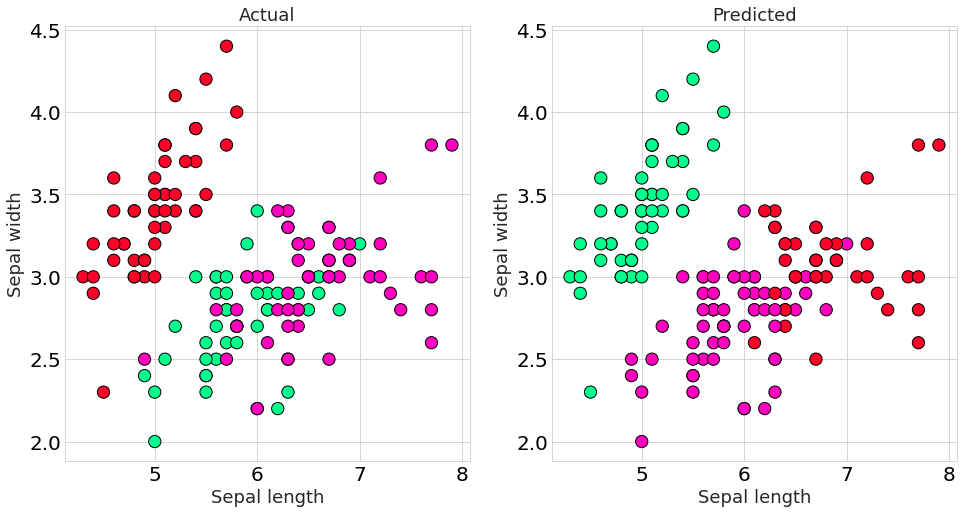

In [33]:
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Therefore, the optimum number of clusters is predicted and represented visually. 

Thank you.

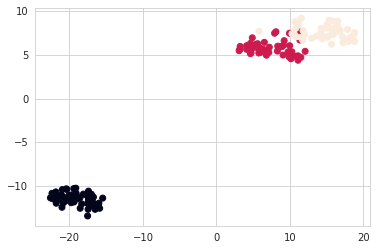

In [36]:
## TSNE
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(x)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

In [ ]:
#  For .fit(), .fit_transform(), .transform() are implemented using transformers.
#  a transformer is an estimator that implements the transform() and/or fit_transform() methods.
#  base.TransformerMixin is the default implementation and a Mixin class that provides a consistent interface across transformers of sklearn.
# .transform() performs computations on test dataset & return output in matrix format containing equal number of samples passed as input data
#  .fit_transoform() fits the transformer and returns transformed training instances. It is equal to fit().transform(). .fit_transform() is used because of its efficeiency.

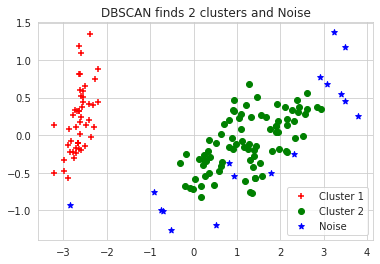

In [39]:
from sklearn.cluster import DBSCAN
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise.Finds core samples of high density and expands clusters from them.
# Good for data which contains clusters of similar density.
from sklearn.decomposition import PCA
# Principal component analysis (PCA).Linear dimensionality reduction using Singular Value Decomposition of the
# data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the decomposition
dbscan = DBSCAN()

# Fitting
dbscan.fit(x)

# Transoring Using PCA
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()